### Sources
1. https://www.kaggle.com/competitions/siim-covid19-detection/overview
2. https://pydicom.github.io/pydicom/stable/auto_examples/image_processing/index.html
3. https://www.pcir.org/researchers/54879843_20060101.html

I tried a scout image from Kaggle Covid-CT dataset and a series from the Patient Contributed Repository to understand the differences

In [52]:
import pydicom as dicom
import kaggle
import os
import matplotlib.pyplot as plt
import glob
import numpy as np

In [53]:
#Kaggle api setup: SIIM-FISABIO-RSNA COVID-19 Detection dataset
!kaggle competitions files -c siim-covid19-detection
!kaggle competitions download -c siim-covid19-detection -f test/0107f2d291d6/aba5c3f634b3/695e2c6dede4.dcm -p ./dicom_samples
!unzip ./dicom_samples/695e2c6dede4.dcm.zip -d ./dicom_samples/

Next Page Token = CfDJ8AuLNK2TuwVNoq0UgqCcqcbhG4Z6IhGjNxcV2vVAv9-eeZ77YyJbcnfBlP6iOIxlJ-eSA8ZVpA6MYdbwKRdaD6E
name                                             size  creationDate         
-----------------------------------------------  ----  -------------------  
test/0107f2d291d6/aba5c3f634b3/695e2c6dede4.dcm  10MB  2021-05-17 18:29:04  
test/0241bc13eac6/ff4defec6636/0cccb1eca1fc.dcm   3MB  2021-05-17 18:29:04  
test/0321bb7f84b5/693e1cfbf1db/53b4af5b74d7.dcm  17MB  2021-05-17 18:29:04  
test/00188a671292/3eb5a506ccf3/3dcdfc352a06.dcm  14MB  2021-05-17 18:29:04  
test/00d63957bc3a/07919a1b758c/dbae9b9b9500.dcm   7MB  2021-05-17 18:29:04  
test/00be7de16711/bfef2920427a/cea591e99b8a.dcm  15MB  2021-05-17 18:29:04  
test/03e0a59d9b8a/bcea811cec05/26fa9834387e.dcm  13MB  2021-05-17 18:29:04  
test/0154653179fa/021e7fc630b9/51635cbfbe18.dcm  16MB  2021-05-17 18:29:04  
test/02ee3a9820eb/86d5eb6d44df/ad98af65ad2a.dcm  29MB  2021-05-17 18:29:04  
test/006486aa80b2/fe138b3d009e/5e0e7acd9c7d

In [54]:
image_dir = os.getcwd()
file_path = ['695e2c6dede4.dcm']
# read dicom file
d_file = dicom.dcmread(os.path.join(image_dir, "dicom_samples", file_path[0]))

In [87]:
print(f"All keys: {dir(d_file)}")
print(f"Image shape: {d_file.pixel_array.shape}")
# print(f"Slice location: {d_file.SliceLocation}")

All keys: ['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'DeidentificationMethod', 'DeidentificationMethodCodeSequence', 'HighBit', 'ImageType', 'ImagerPixelSpacing', 'InstanceNumber', 'Modality', 'PatientID', 'PatientName', 'PatientSex', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SeriesInstanceUID', 'SeriesNumber', 'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID', 'StudyTime', '__array__', '__class__', '__contains__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__firstlineno__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__

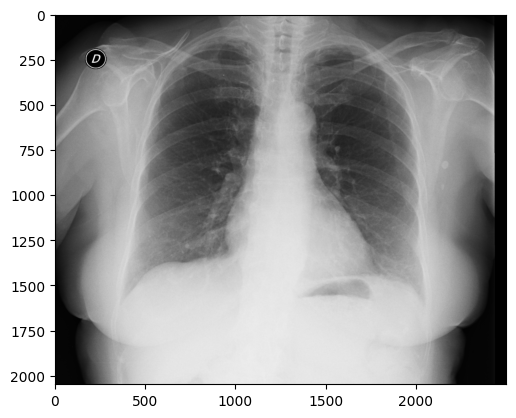

In [56]:
plt.imshow(d_file.pixel_array, cmap="gray")

   Tested using series 2 from here
   https://www.pcir.org/researchers/54879843_20060101.html

In [73]:
series_list = glob.glob("./dicom_samples/Series */*.dcm")
len(series_list)
print(series_list)

['./dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.47.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.136.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.9.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.87.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.63.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.26.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.112.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.1849416866.1385765836848.61.0.dcm', './dicom_samples/Series 002 [CT - Crane SPC]/1.3.6.1.4.1.5962.99.1.2786334768.18494168

In [74]:
d_files = []
for series in series_list:
    d_files.append(dicom.dcmread(os.path.join(image_dir, series)))
print(len(d_files))

143


In [75]:
slices = []
skipcount = 0
for f in d_files:
    if hasattr(f, "SliceLocation"):
        slices.append(f)
    else:
        # print(f"No attribute for {f}")
        skipcount = skipcount + 1

print(f"Total skipped due to absence of SliceLocation: {skipcount}")
print(slices[0].SliceLocation)

Total skipped due to absence of SliceLocation: 0
31.250


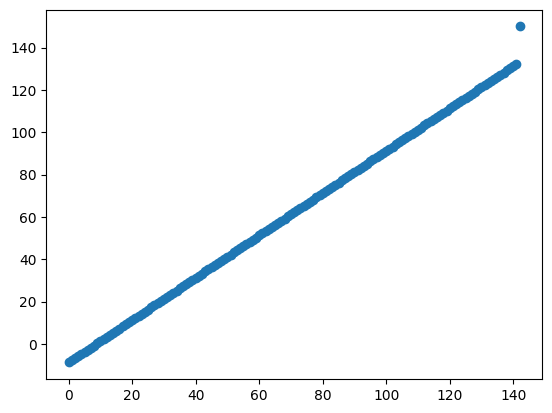

In [85]:
all_slice_locations = []
for slice in slices:
    all_slice_locations.append(slice.SliceLocation)

x_plot = list(range(len(all_slice_locations)))
plt.figure()
plt.scatter(x_plot, all_slice_locations)

Final 3D volume shape: (512, 512, 143)


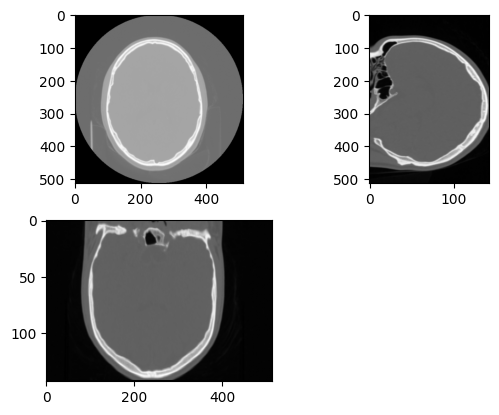

In [83]:
# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)
# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1] / ps[0]
sag_aspect = ps[1] / ss
cor_aspect = ss / ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

print(f"Final 3D volume shape: {img3d.shape}")
# fill 3D array with the images from the files
for i, s in enumerate(slices[:-1]):
    img2d = s.pixel_array
    # print(img2d.shape)
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2] // 2], cmap="gray")
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1] // 2, :], cmap="gray")
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0] // 2, :, :].T, cmap="gray")
a3.set_aspect(cor_aspect)

plt.show()